# Case Study 
## The annual Percentage Rate of Interest Charged on New-Car Loans at Nine of the 					Largest Banks in Six American Cities is provided and It is believed that the mean interest rate is same across the six american cities.  Conduct the hypothesis test and provide your inference


Use level of significance $\alpha$ = 0.05

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
df = pd.read_csv('car_insurance_rate.csv')

In [3]:
df.head()

,Atlanta,Chicago,Houston,Memphis,New York,Philadelphia
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00


In [4]:
df.describe()

,Atlanta,Chicago,Houston,Memphis,New York,Philadelphia
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,13.194444,12.611111,13.306667,13.244444,13.483333,12.200000
std,0.446825,0.710096,0.556350,0.967007,0.718940,0.504356
min,12.500000,11.900000,12.500000,11.890000,12.450000,11.900000
25%,13.000000,12.300000,13.000000,12.500000,13.000000,12.000000
50%,13.000000,12.500000,13.500000,13.250000,13.750000,12.000000
75%,13.500000,12.750000,13.510000,13.750000,14.000000,12.250000
max,13.750000,14.250000,14.000000,15.000000,14.500000,13.500000


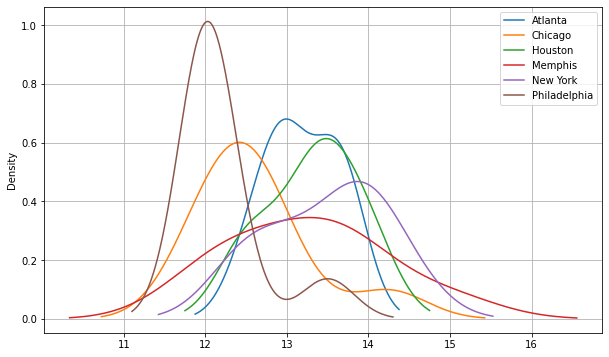

In [5]:
plt.figure(figsize=(10,6))
for i in df.columns:
    df[i].plot(kind='kde')
    plt.legend()
    plt.grid()
plt.show()

In [6]:
rate_melt=df.melt(var_name='city') # using melt will reshape the dataframe and make it suitable for ols model
rate_melt

,city,value
0,Atlanta,13.75
1,Atlanta,13.75
2,Atlanta,13.50
3,Atlanta,13.50
4,Atlanta,13.00
5,Atlanta,13.00
6,Atlanta,13.00
7,Atlanta,12.75
8,Atlanta,12.50
9,Chicago,14.25


# 1. Postulate the Null and Alternate Hypothesis

H0: The mean interest rate in all six american cities is same

H1: The mean interest rate is different in atleast one of the six american cities

In [7]:
rate_melt.shape

(54, 2)

We have 6 categories of city, hence Degree of Freedom is 6 - 1 = 5

Residual has Degree of Freedom = 54 - 1 -5 = 48

In [9]:
rate_melt.city = pd.Categorical(rate_melt.city)

# 2. Perform the analysis of variances test on the dataset

In [10]:
formula = 'value ~ C(city)'
model = ols(formula, rate_melt).fit()
aov_table = anova_lm(model)
print(aov_table)

            df     sum_sq   mean_sq         F    PR(>F)
C(city)    5.0  10.945667  2.189133  4.829385  0.001175
Residual  48.0  21.758133  0.453294       NaN       NaN


# 3. What are sum of squared variance within and sum of squared variance between?

Sum of Squared variance within is the sum over the sums of squared deviations of scores around their group’s mean

Sum of Squared variance between is the sum of squared deviation of the group means from the grand mean

# 4. Calculate sum of squared total for above

SST=SSB+SSW

In [11]:
aov_table['sum_sq']

C(city)     10.945667
Residual    21.758133
Name: sum_sq, dtype: float64

In [12]:
SSW=aov_table['sum_sq'][1]
SSB=aov_table['sum_sq'][0]
SST= SSW+SSB
print('Sum of Squared Total',SST)

Sum of Squared Total 32.70379999999997


# 5. What is the significance of F dist/statistic?

F-Distribution or F-Statistic is the ratio of MSB to MSW.

It gives the degree of how relatively greater the difference is 'between group means' (MSB) compared to 'within group variance' (MSW)

If the ratio is greater than expected will mean that not all the group means are the same and at least one mean is substantially different.

# 6. Interpret the results and present the conclusion

pvalue=0.001174551414504048 is smaller than the level of significance α 0.05

The null hypothesis is rejected based on the above observation and it is concluded that the mean interest rate is not same across all six american cities